In [4]:
#Import all the necessary libraries
import csv
import numpy as np 
import matplotlib.pyplot as plt
import graphviz 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [5]:
########################################################################################################################
# Function Name: plot_confusion_matrix
# Function Inputs : cm,classes,normalize,title, cmap
# Returns: ax
# Description: This function takes in a confusion matrix and plots it out in a matplot axis. This function is used as a 
#              helper to make a nice graphical representation of the confusion matrix. This function was obtained from 
#              https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
#########################################################################################################################
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = cm
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
########################################################################################################################
# Function Name: calculateSpecSens
# Function Inputs : cmat
# Returns: Specificity, Sensitivity
# Description: This function takes in a confusion matrix and computes the predicted specificity and sensitivity. This is  
#              a helper function to make calculation of these parameters easier.
#########################################################################################################################
def calculateSpecSens(c_mat):
    FP_0 = c_mat[1,0]+c_mat[2,0]
    FP_1 = c_mat[0,1]+c_mat[2,1]
    FP_2 = c_mat[0,2]+c_mat[1,2]
    
    TN_0 = c_mat[1,1]+c_mat[1,2]+c_mat[2,1]+c_mat[2,2]
    TN_1 = c_mat[0,0]+c_mat[0,2]+c_mat[2,0]+c_mat[2,2]
    TN_2 = c_mat[0,0]+c_mat[0,1]+c_mat[1,0]+c_mat[1,1]
    Specificity_0 = TN_0/(TN_0+FP_0)
    Specificity_1 = TN_1/(TN_1+FP_1)
    Specificity_2 = TN_2/(TN_2+FP_2)
    Specificity = (Specificity_0+Specificity_1+Specificity_2)/3
    
    TP_0 = c_mat[0,0]
    FN_0 = c_mat[0,1]+c_mat[0,2]
    TP_1 = c_mat[1,1]
    FN_1 = c_mat[1,0]+c_mat[1,2]
    TP_2 = c_mat[2,2]
    FN_2 = c_mat[2,0]+c_mat[2,1]
    Sensitivity_0 = TP_0/(TP_0+FN_0)
    Sensitivity_1 = TP_1/(TP_1+FN_1)
    Sensitivity_2 = TP_2/(TP_2+FN_2)
    Sensitivity = (Sensitivity_0+Sensitivity_1+Sensitivity_2)/3
    return Specificity,Sensitivity

In [6]:
#Open the data file
csv.register_dialect('myDialect',
delimiter = '\t',
skipinitialspace=True)

#Read data and store the data
data_table = []
with open('Fisher.txt', 'r') as csvFile:
    reader = csv.reader(csvFile, dialect='myDialect')
    data_table = list(reader)
csvFile.close()

header = data_table[0]
del data_table[0]

data = np.zeros((len(data_table), len(data_table[0])))

for i in range(0,len(data_table)):
    tmp = data_table[i]
    for j in range(0,len(tmp)):
        data[i,j] = float(tmp[j])

#Seperate the Feature Columns and Label Column        
feature=data[:,[1,2,3,4]]
labels=data[:,[0]]

# Split the data 80% and 20% for Train and Test
train_data_features, test_data_features, train_data_labels, test_data_labels = train_test_split(feature, labels, test_size=0.2, random_state=10)


In [7]:
# Some string vectors for the Decision tree diagram. These are only used for the decision tree plot and serve no other purpose
classes=['setosa','verginica','versicolor']
features=['Petal Width(cm)','Petal Length(cm)','Sepal Width(cm)', 'Sepal Length(cm)']

#Define Decision Tree Classifier & fit the model to the train data
d3=tree.DecisionTreeClassifier()
clf=d3.fit(train_data_features,train_data_labels)


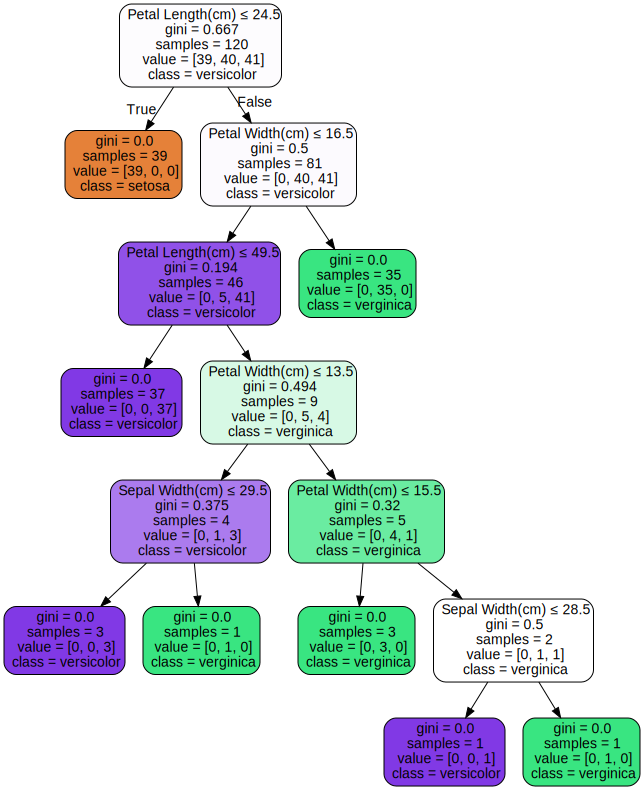

In [8]:
# Draw the Decision Tree Diagram
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=features,class_names=classes, filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [9]:
#Save the diagram as a png file
graph.format='png'
graph.render("Decision Tree") 

'Decision Tree.png'

Confusion matrix, without normalization
[[11  0  0]
 [ 0 10  0]
 [ 0  2  7]]
The Decision Tree Classifier Accuracy is: 93.333333%
The Decision Tree Classifier Predicted Precision is: 94.444444%
The Decision Tree Classifier Predicted Specificity is: 96.666667%
The Decision Tree Classifier Predicted Sensitivity is: 92.592593%


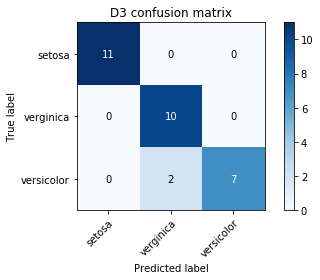

In [10]:
#Test the classifier using the test dataset separted above
prediction_d3=clf.predict(test_data_features)

#Generate the confusion matrix using the correct labels
cmat_d3=confusion_matrix(test_data_labels,prediction_d3)

#Plot and save the confusion matrix as a png file
plot_confusion_matrix(cmat_d3, classes=classes, title='D3 confusion matrix')
plt.savefig('D3 confusion matrix.png')

#Compute the accuracy 
d3_score=accuracy_score(test_data_labels,prediction_d3)
print('The Decision Tree Classifier Accuracy is: %f'%(d3_score*100)+'%')

#Compute the Precision
Predicted_precision_d3=precision_score(test_data_labels, prediction_d3, average='macro')
print('The Decision Tree Classifier Predicted Precision is: %f'%(Predicted_precision_d3*100)+'%')

#Compute the Specificity and Sensitivity
Predicted_Specificity_d3,Predicted_Sensitivity_d3=calculateSpecSens(cmat_d3)
print('The Decision Tree Classifier Predicted Specificity is: %f'%(Predicted_Specificity_d3*100)+'%')
print('The Decision Tree Classifier Predicted Sensitivity is: %f'%(Predicted_Sensitivity_d3*100)+'%')


Confusion matrix, without normalization
[[11  0  0]
 [ 0  8  2]
 [ 0  1  8]]
The Decision Tree Classifier Accuracy with PCA is: 90.000000%
The Decision Tree Classifier Predicted Precision is: 89.629630%
The PCA + Decision Tree Classifier Predicted Specificity is: 95.158730%
The PCA + Decision Tree Classifier Predicted Sensitivity is: 89.629630%


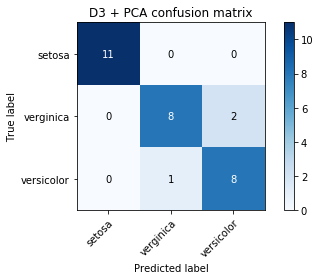

In [11]:
# Scale the input data (Good Practice when performing PCA)
sc=StandardScaler()
train_set=sc.fit_transform(train_data_features)
test_set=sc.fit_transform(test_data_features)

#Perform PCA on the input data reducing the input from 4 dimensions to 2 dimensions
pca=PCA(n_components=2)
pca_train_set= pca.fit_transform(train_set) 
pca_test_set=pca.fit_transform(test_set)

#Run Decision Tree Classifier on the PCA training data & Predict Labels using the PCA test data
clf_pca=d3.fit(pca_train_set,train_data_labels)
prediction_pca=clf_pca.predict(pca_test_set)

#Create Confusion matrix & plot the confusion matrix
cmat_pca=confusion_matrix(test_data_labels,prediction_pca)
plot_confusion_matrix(cmat_pca, classes=classes, title='D3 + PCA confusion matrix')
plt.savefig('D3 + PCA confusion matrix.png')

#Evaluate performance of the Classifer with PCA
d3_pca_score=accuracy_score(test_data_labels,prediction_pca)
print('The Decision Tree Classifier Accuracy with PCA is: %f'%(d3_pca_score*100)+'%')

Predicted_precision_d3_pca=precision_score(test_data_labels, prediction_pca, average='macro')
print('The Decision Tree Classifier Predicted Precision is: %f'%(Predicted_precision_d3_pca*100)+'%')

Predicted_Specificity_d3_pca,Predicted_Sensitivity_d3_pca=calculateSpecSens(cmat_pca)
print('The PCA + Decision Tree Classifier Predicted Specificity is: %f'%(Predicted_Specificity_d3_pca*100)+'%')
print('The PCA + Decision Tree Classifier Predicted Sensitivity is: %f'%(Predicted_Sensitivity_d3_pca*100)+'%')

Confusion matrix, without normalization
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
The Decision Tree Classifier Accuracy with LDA is: 100.000000%
The Decision Tree Classifier Predicted Precision is: 100.000000%
The LDA + Decision Tree Classifier Predicted Specificity is: 100.000000%
The LDA + Decision Tree Classifier Predicted Sensitivity is: 100.000000%


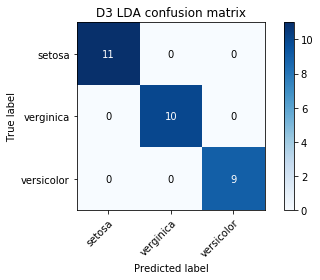

In [9]:
#Perform LDA on the input data reducing the input from 4 dimensions to 2 dimensions
lda=LDA(n_components=2)
lda_train_set=lda.fit_transform(train_set,np.ravel(train_data_labels))
lda_test_set = lda.transform(test_set)

#Run Decision Tree Classifier on the LDA training data & Predict Labels using the LDA test data
clf_lda=d3.fit(lda_train_set,train_data_labels)
prediction_lda=clf_lda.predict(lda_test_set)

#Create Confusion matrix & Plot the confusion matrix
cmat_lda=confusion_matrix(test_data_labels,prediction_lda)
plot_confusion_matrix(cmat_lda, classes=classes, title='D3 LDA confusion matrix')
plt.savefig('D3 + LDA confusion matrix.png')

#Evaluate performance of the Classifer with LDA
d3_lda_score=accuracy_score(test_data_labels,prediction_lda)
print('The Decision Tree Classifier Accuracy with LDA is: %f'%(d3_lda_score*100)+'%')

Predicted_precision_d3_lda=precision_score(test_data_labels, prediction_lda, average='macro')
print('The Decision Tree Classifier Predicted Precision is: %f'%(Predicted_precision_d3_lda*100)+'%')

Predicted_Specificity_d3_lda,Predicted_Sensitivity_d3_lda=calculateSpecSens(cmat_lda)
print('The LDA + Decision Tree Classifier Predicted Specificity is: %f'%(Predicted_Specificity_d3_lda*100)+'%')
print('The LDA + Decision Tree Classifier Predicted Sensitivity is: %f'%(Predicted_Sensitivity_d3_lda*100)+'%')